# K-nearest Neighbour (KNN)
KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems.

It is a non-parametric, lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. Lazy learning means that it does not require any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [1]:
# import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ML liberaries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # for classification problems
from sklearn.neighbors import KNeighborsRegressor # for regression problems
from sklearn.metrics import classification_report, confusion_matrix # for evaluation of classification model
from sklearn.metrics import mean_squared_error, r2_score # for evaluation of regression model

## 1. KNN For Regression 

In [3]:
# load the data set
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
# data-preprocessing (Encoding the columns)
for col in df.columns:
    if df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

In [12]:
# Choose Features (X) and Labels (y)
X = df.drop('tip', axis = 1)
y = df['tip']

In [13]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [14]:
# call the model
model = KNeighborsRegressor(n_neighbors = 5)

In [15]:
# train the model
model.fit(X_train, y_train)

KNeighborsRegressor()

In [16]:
# prediction
y_pred = model.predict(X_test)

In [17]:
# evaluation
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2: {r2_score(y_test, y_pred)}")

MSE: 0.8382265306122448
RMSE: 0.9155471209130881
R2: 0.3294034029001649


## 2. KNN For Classifier 

In [18]:
# import the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
# Choose Features (X) and Labels (y)
X = df.drop('species', axis = 1)
y = df['species']

In [21]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
# call the model
model = KNeighborsClassifier(n_neighbors = 5)

In [23]:
# train the model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# predict the model
y_pred = model.predict(X_test)

In [26]:
# evaluate the model 
print(f"Confusion Matrix: /n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: /n {classification_report(y_test, y_pred)}")

Confusion Matrix: /n [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: /n               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



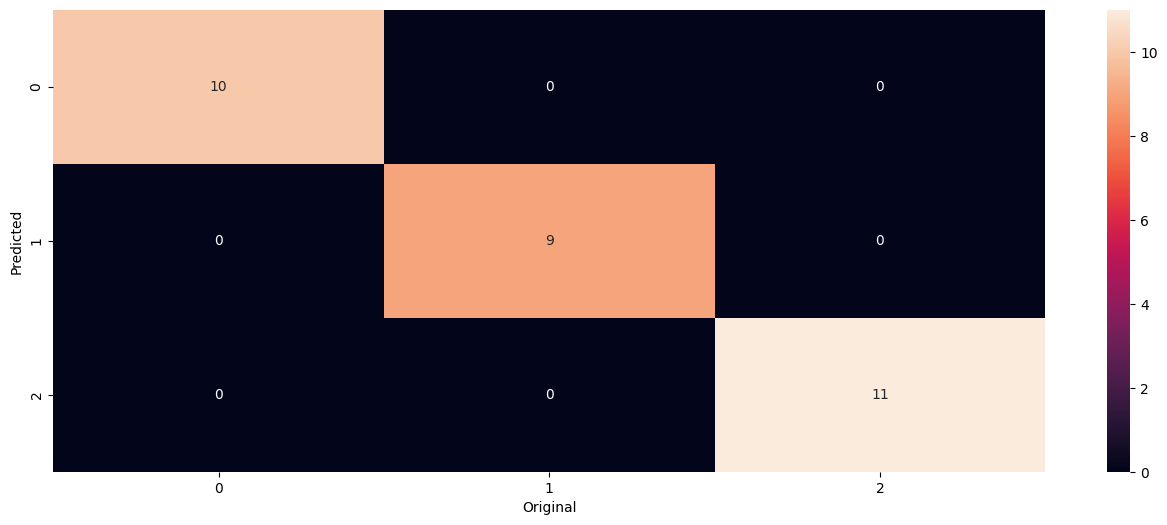

In [28]:
# Let's plot the confusion matrix
plt.figure(figsize = (16, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()